In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

In [10]:
with open('../data/census.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [12]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [13]:
predictions = random_forest.predict(X_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [14]:
accuracy_score(y_test, predictions)

0.8507676560900717

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



0.8507676560900717

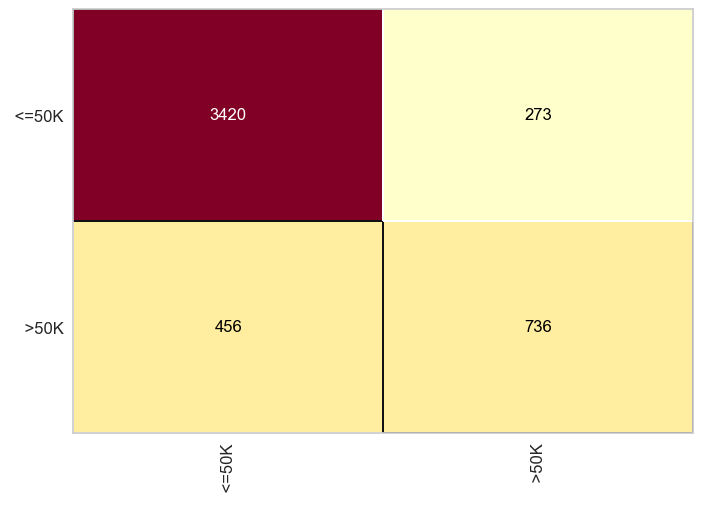

In [16]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)